In [24]:
from keras.models import load_model
from keras.layers import Dense, Flatten
from keras import Model
import pandas as pd
import numpy as np

In [38]:
model = load_model('pickles/train_3_66.7-emb_dr3_bi_dr5_bi_dr4.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 32, 300)           11090400  
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32, 300)           541200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 300)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32, 300)           541200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 300)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9600)              0         
__________

In [2]:
def reshape_model(model):
    model.pop()
    model.pop()
    for layer in model.layers:
        layer.trainable = False

    dense1 = Dense(150, activation='relu')
    dense2 = Dense(7, activation='softmax')

    model.add(dense1)
    model.add(Flatten())
    model.add(dense2)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [3]:
import pickle

In [8]:
model = load_model('pickles/train_3_65-mine.h5')

In [9]:
reshape_model(model)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 32, 300)           11335500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32, 300)           541200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 300)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32, 300)           541200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 300)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 32, 150)           45150     
__________

In [10]:
tweets = pd.read_feather('pickles/train_7.feather')
tweets.head(10)

/home/epita/.local/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


,ID,Class,Tweet,Sentiment
0,0,0,yeah ☺ ️ playing well,0
1,1,0,least not guy try discourage anymore want neve...,0
2,2,0,uplift still discourage mean listen wrong voic...,0
3,3,0,... age heyday blood tame ...,0
4,4,-2,embarrassed saw u like knvfkkjg think stalker ...,-2
5,5,-3,really plan make video week tv die phone break...,-3
6,6,-3,hate idea afraid share,-3
7,7,1,regular cheerfulness emotion supper give lady ...,1
8,8,1,pessimist see difficulty every opportunity opt...,1
9,9,-2,hurt ndoes not mean hurt ndoes not mean not ge...,-2


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [13]:
train_tweets, sentiments = tweets['Tweet'], tweets['Sentiment']

tokenizer = pickle.load(open("pickles/tokenizer.pickle", 'rb'))
sequences = tokenizer.texts_to_sequences(train_tweets)

MAX_SEQUENCE_LENGTH = 32

train_sequences = pad_sequences(sequences, MAX_SEQUENCE_LENGTH)
targets = to_categorical(sentiments, 7)

In [14]:
print(train_sequences.shape)
print(targets.shape)

(1630, 32)
(1630, 7)


In [15]:
X_train, X_val, y_train, y_val = train_test_split(train_sequences, targets, test_size=0.3)

print('training set: ' + str(len(X_train)) + ' samples')
print('validation set: ' + str(len(X_val)) + ' samples')

print('x_train:', X_train.shape)
print('y_train:', y_train.shape)


training set: 1141 samples
validation set: 489 samples
x_train: (1141, 32)
y_train: (1141, 7)


In [16]:
model.fit(X_train, y_train, batch_size=128, validation_data=(X_val, y_val), epochs=5)

Train on 1141 samples, validate on 489 samples
Epoch 1/5
1141/1141 [==============================] - 4s 3ms/step - loss: 1.8348 - acc: 0.2805 - val_loss: 1.7480 - val_acc: 0.2761
Epoch 2/5
1141/1141 [==============================] - 2s 2ms/step - loss: 1.6824 - acc: 0.3260 - val_loss: 1.6449 - val_acc: 0.3129
Epoch 3/5
1141/1141 [==============================] - 2s 2ms/step - loss: 1.6115 - acc: 0.3620 - val_loss: 1.6084 - val_acc: 0.3129
Epoch 4/5
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5924 - acc: 0.3602 - val_loss: 1.5922 - val_acc: 0.3231
Epoch 5/5
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5892 - acc: 0.3514 - val_loss: 1.5823 - val_acc: 0.3292


In [17]:
model.fit(X_train, y_train, batch_size=128, validation_data=(X_val, y_val), epochs=30)

Train on 1141 samples, validate on 489 samples
Epoch 1/30
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5796 - acc: 0.3663 - val_loss: 1.5772 - val_acc: 0.3252
Epoch 2/30
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5720 - acc: 0.3795 - val_loss: 1.5723 - val_acc: 0.3231
Epoch 3/30
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5656 - acc: 0.3751 - val_loss: 1.5770 - val_acc: 0.3313
Epoch 4/30
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5522 - acc: 0.3777 - val_loss: 1.5807 - val_acc: 0.3436
Epoch 5/30
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5451 - acc: 0.3812 - val_loss: 1.5694 - val_acc: 0.3395
Epoch 6/30
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5359 - acc: 0.3812 - val_loss: 1.5791 - val_acc: 0.3497
Epoch 7/30
1141/1141 [==============================] - 2s 2ms/step - loss: 1.5292 - acc: 0.3742 - val_loss: 1.5632 - val_acc: 0.3436
Epoch 8/30
1141

# Model evaluation

In [80]:
y_pred = np.argmax(model.predict(X_val, batch_size=128), axis=1)
y_true = np.argmax(y_val, axis=1)

In [81]:
from scipy.stats import pearsonr
from sklearn.metrics import cohen_kappa_score


p = pearsonr(y_true, y_pred)[0]
w = cohen_kappa_score(y_pred, y_true, weights='quadratic')

print(f'Pearson: {p}')
print(f'Quadratic kappa: {w}')

Pearson: 0.3063723854696158
Quadratic kappa: 0.3025828215169144


In [55]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true, y_pred)
cm

array([[72,  5,  5, 12,  5, 25,  0],
       [44,  6,  2, 15,  1, 10,  0],
       [13,  5,  2, 12,  0,  4,  0],
       [13,  6,  2, 33,  0,  2,  0],
       [11,  1,  0,  3, 22, 25,  0],
       [31,  1,  0,  3, 13, 47,  2],
       [18,  0,  0,  2,  3, 13,  0]])

In [53]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

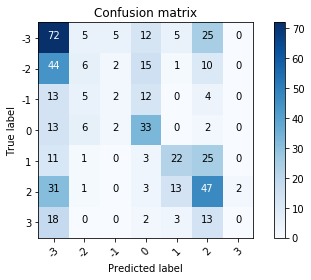

In [54]:
plot_confusion_matrix(cm, [-3, -2, -1, 0, 1, 2, 3])

## Class distribution

Sentiment,-3,-2,-1,0,1,2,3
ID,198,344,112,446,225,127,178
Class,198,344,112,446,225,127,178
Tweet,198,344,112,446,225,127,178


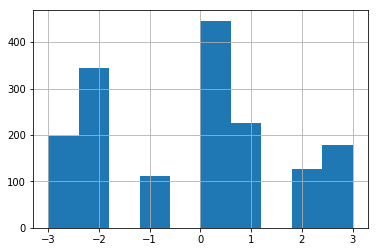

In [72]:
display(tweets.groupby('Sentiment').count().T)
sentiments.hist()